** Universidad Carlos III de Madrid **

*Computational Aerodynamics*

# Exercises on Finite Differences

1. In this exercise we are going to evaluate numerically the derivative of three functions and compare the results with the analytical expressions. In all cases we are agoing to compute the first derivative at $x=0$. The functions to be studied are:
  * $f_1(x) = \cos x$,
  * $f_2(x) = \sin x$,
  * $f_3(x) = \exp x$.
  
  You will sample the functions at some points, first with a grid spacing $\Delta x = 0.1$. For example, for the second order central formula, you would need the values $f(0+\Delta x)$ and $f(0-\Delta x)$. Use:
a first order forward formula,
    * a first order backward formul,
    * a second order central formula,
    * develop a fourth order central difference formula and use it as well.

2. A model for the velocity profile of a given boundary layer is given by the equation $v=A(1-\exp(-y/L))$, with $L=1$ and $A=1582$. Evaluate numerically the first derivative of $v$ at $y=0$, using the four grid points $y=0, 0.1,0.2$ and 0.3. Use one-sided formulas first, second and third order of accuracy. Compare the results with the analytical solution.

# Solution

## Exercise 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First, it is a good idea to look at the functions we are considering.

In [23]:
#Discretizing functions
Dx = 0.1; #Number of points used for discretizing
x = np.arange(-np.pi,np.pi,Dx); #Create vector x#
f1 = np.cos(x); #f1
f2 = np.sin(x); #f2
f3 = np.exp(x);#f3

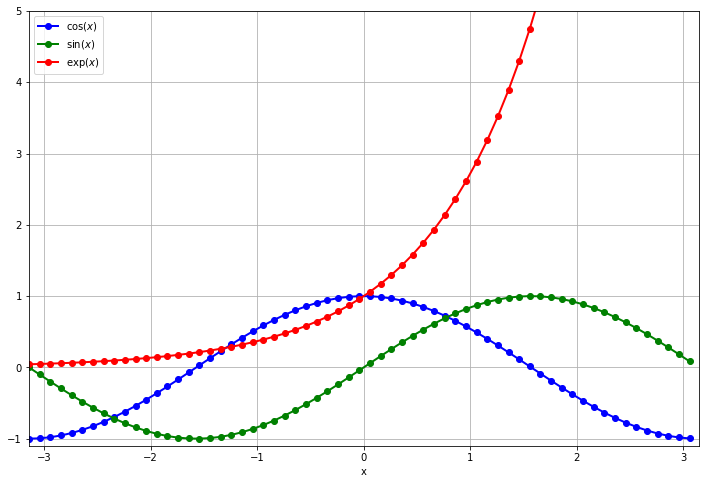

In [24]:
#Plot
fig = plt.figure(figsize=[12,8])
plt.plot(x,f1,'bo-',lw=2.0,label=r'$\cos(x)$')
plt.plot(x,f2,'go-',lw=2.0,label=r'$\sin(x)$')
plt.plot(x,f3,'ro-',lw=2.0,label=r'$\exp(x)$')
plt.legend(loc=2)
plt.xlim([-np.pi,np.pi])
plt.ylim([-1.1,5])
plt.grid('on');
plt.xlabel('x')
#plot(x,f2);

We can also define the analytical solution of this three functions using the same grid $x$.

In [25]:
df1_anal = -np.sin(x);
df2_anal = np.cos(x);
df3_anal = np.exp(x);

### (a) First Derivative Forward Finite Differences  (First order)

$f'(x_0) \approx \frac{f(x_0+\Delta x) - f(x_0)}{\Delta x} - f(x_0)^{\prime \prime} \frac{\Delta x}{2} + O(\Delta x^2)$

In [26]:
#Discretizing the functions
Dx = 0.1; #Number of points used for discretizing
x = np.arange(-np.pi,np.pi,Dx); #Create vector x#
f1 = np.cos(x); #f1
f2 = np.sin(x); #f2
f3 = np.exp(x);#f3

In [27]:
df1 = (f1[1:]-f1[:-1])/Dx #df1/dx First order  Forward
df2 = (f2[1:]-f2[:-1])/Dx #df2/dx First order  Forward
df3 = (f3[1:]-f3[:-1])/Dx #df3/dx First order  Forward

** Question:** any problem with this calculation? 

*hint:* count points...

Plot results and compare with analytical solution.

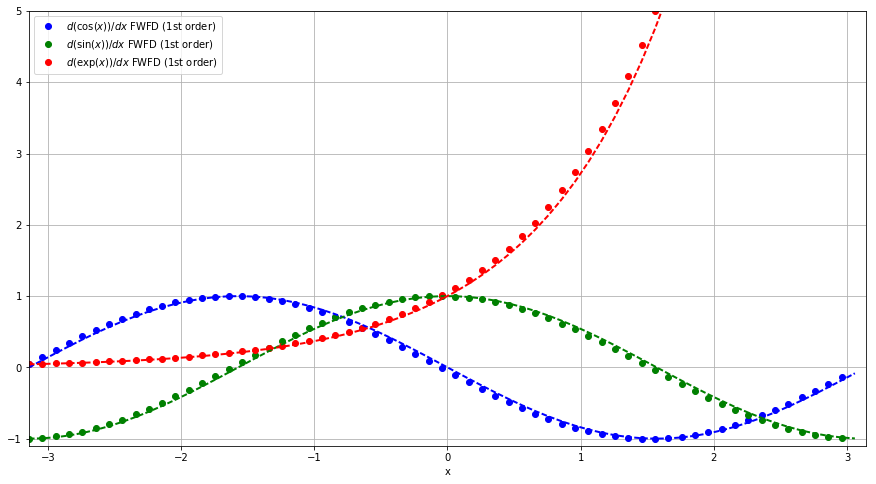

In [29]:
#Plot
fig = plt.figure(figsize=[15,8])
plt.plot(x[:-1],df1,'bo',lw=2.0,label=r'$ d (\cos(x)) / d x$ FWFD (1st order)')
plt.plot(x[:-1],df2,'go',lw=2.0,label=r'$ d (\sin(x)) / d x$ FWFD (1st order)')
plt.plot(x[:-1],df3,'ro',lw=2.0,label=r'$ d (\exp(x)) / d x$ FWFD (1st order)')

plt.plot(x ,df1_anal,'b--',lw=2.0)
plt.plot(x ,df2_anal,'g--',lw=2.0)
plt.plot(x ,df3_anal,'r--',lw=2.0)
plt.legend(loc=2)
plt.xlim([-np.pi,np.pi])
plt.ylim([-1.1,5])
plt.grid('on');
plt.xlabel('x')
#plot(x,f2);

### Results at x=0

Now, we will create a vector of results for different grid spaces.

In [30]:
Ngrids= 10
vDx = np.logspace(-5,-1,Ngrids); #Create spacing vector
vFWFD_f1 = np.zeros(Ngrids) 
vFWFD_f2 = np.zeros(Ngrids)
vFWFD_f3 = np.zeros(Ngrids) 
df1_anal0 = 0.0;
df2_anal0 = 1.0;
df3_anal0 = 1.0;
ii = 0
for Dx in vDx:
    vFWFD_f1[ii] = (np.cos(0+Dx)-np.cos(0))/Dx;
    vFWFD_f2[ii] = (np.sin(0+Dx)-np.sin(0))/Dx;
    vFWFD_f3[ii] = (np.exp(0+Dx)-np.exp(0))/Dx;
    ii = ii + 1;
    if ii ==Ngrids:
        print "Numerical approximation of f1-derivative (Dx = %s) = %s, analytical value = %s"\
        %(vDx[ii-1],vFWFD_f1[ii-1],df1_anal0)
        print "Numerical approximation of f2-derivative (Dx = %s) = %s, analytical value = %s"\
        %(vDx[ii-1],vFWFD_f2[ii-1],df2_anal0)
        print "Numerical approximation of f3-derivative (Dx = %s) = %s, analytical value = %s"\
        %(vDx[ii-1],vFWFD_f3[ii-1],df3_anal0)

Numerical approximation of f1-derivative (Dx = 0.1) = -0.0499583472197, analytical value = 0.0
Numerical approximation of f2-derivative (Dx = 0.1) = 0.998334166468, analytical value = 1.0
Numerical approximation of f3-derivative (Dx = 0.1) = 1.05170918076, analytical value = 1.0


### Plot error as a function of $\Delta x$ 

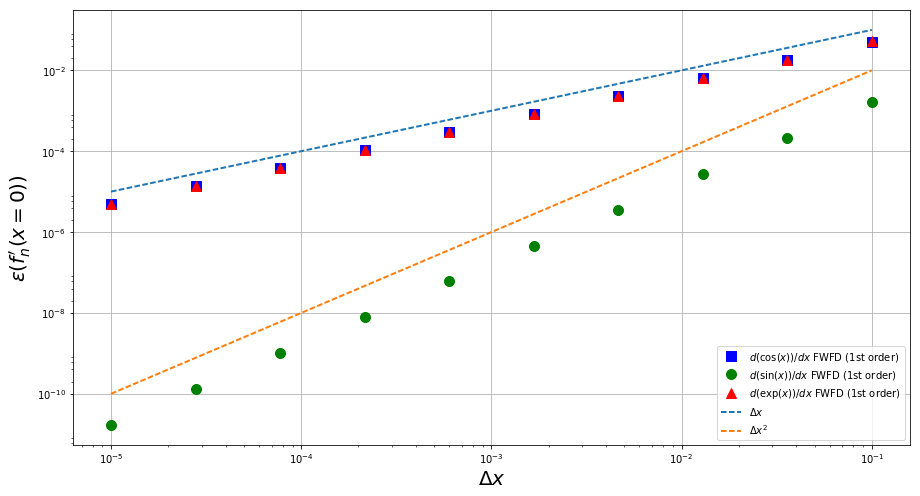

In [31]:
#Plot
fig = plt.figure(figsize=[15,8])
plt.plot(vDx,np.abs(vFWFD_f1-df1_anal0),'bs',ms=10,lw=2.0,label=r'$ d (\cos(x)) / d x$ FWFD (1st order)')
plt.plot(vDx,np.abs(vFWFD_f2-df2_anal0),'go',ms=10,lw=2.0,label=r'$ d (\sin(x)) / d x$ FWFD (1st order)')
plt.plot(vDx,np.abs(vFWFD_f3-df3_anal0),'r^',ms=10,lw=2.0,label=r'$ d (\exp(x)) / d x$ FWFD (1st order)')
plt.plot(vDx,vDx,ls='dashed',lw=2.0,label=r'$\Delta x$')
plt.plot(vDx,vDx**2,ls='dashed',lw=2.0,label=r'$\Delta x^2$')
plt.legend(loc=4)
#plt.xlim([-np.pi,np.pi])
#plt.ylim([-1.1,5])
plt.grid('on');
plt.xlabel(r'$\Delta x$',size=20)
plt.ylabel(r'$\epsilon(f_n^{\prime}(x=0))$',size=20)
plt.xscale('log')
plt.yscale('log')
#plot(x,f2);

### (b) First Derivative Backward Finite Differences  (First order)

$f'(x_0) \approx \frac{f(x_0) - f(x_0 - \Delta x) }{\Delta x} + f(x_0)^{\prime \prime} \frac{\Delta x}{2} + O(\Delta x^2)$

In [32]:
Ngrids= 10
vDx = np.logspace(-5,-1,Ngrids); #Create spacing vector
vBWFD_f1 = np.zeros(Ngrids) 
vBWFD_f2 = np.zeros(Ngrids)
vBWFD_f3 = np.zeros(Ngrids) 
df1_anal0 = 0.0;
df2_anal0 = 1.0;
df3_anal0 = 1.0;
x0 = 0.0
ii = 0
for Dx in vDx:
    vBWFD_f1[ii] = (np.cos(x0) - np.cos(x0-Dx))/Dx;
    vBWFD_f2[ii] = (np.sin(x0) - np.sin(x0-Dx))/Dx;
    vBWFD_f3[ii] = (np.exp(x0) - np.exp(x0-Dx))/Dx;
    ii = ii + 1;
    if ii ==Ngrids:
        print "Numerical approximation of f1-derivative (Dx = %s) = %s, analytical value = %s"\
        %(vDx[ii-1],vBWFD_f1[ii-1],df1_anal0)
        print "Numerical approximation of f2-derivative (Dx = %s) = %s, analytical value = %s"\
        %(vDx[ii-1],vBWFD_f2[ii-1],df2_anal0)
        print "Numerical approximation of f3-derivative (Dx = %s) = %s, analytical value = %s"\
        %(vDx[ii-1],vBWFD_f3[ii-1],df3_anal0)

Numerical approximation of f1-derivative (Dx = 0.1) = 0.0499583472197, analytical value = 0.0
Numerical approximation of f2-derivative (Dx = 0.1) = 0.998334166468, analytical value = 1.0
Numerical approximation of f3-derivative (Dx = 0.1) = 0.95162581964, analytical value = 1.0


### Plot error as a function of $\Delta x$ 

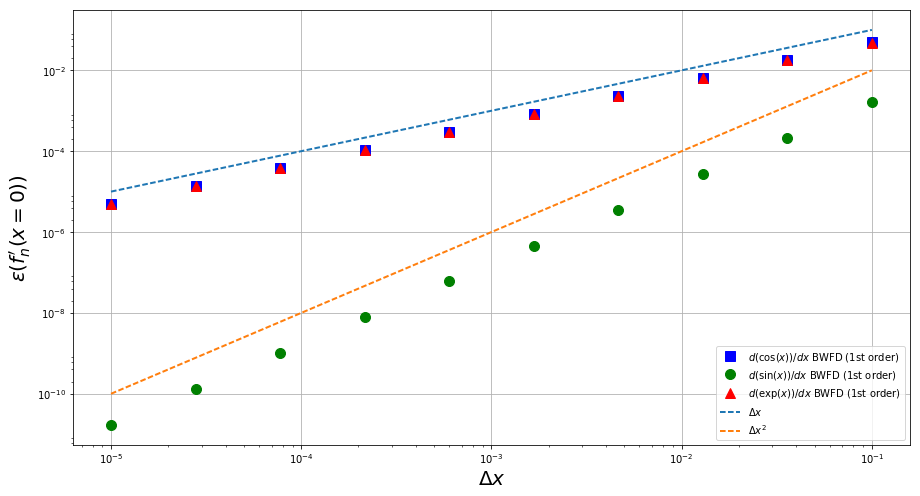

In [33]:
#Plot
fig = plt.figure(figsize=[15,8])
plt.plot(vDx,np.abs(vBWFD_f1-df1_anal0),'bs',ms=10,lw=2.0,label=r'$ d (\cos(x)) / d x$ BWFD (1st order)')
plt.plot(vDx,np.abs(vBWFD_f2-df2_anal0),'go',ms=10,lw=2.0, label=r'$ d (\sin(x)) / d x$ BWFD (1st order)')
plt.plot(vDx,np.abs(vBWFD_f3-df3_anal0),'r^',ms=10,lw=2.0, label=r'$ d (\exp(x)) / d x$ BWFD (1st order)')
plt.plot(vDx,vDx,ls='dashed',lw=2.0,label=r'$\Delta x$')
plt.plot(vDx,vDx**2,ls='dashed',lw=2.0,label=r'$\Delta x^2$')
plt.legend(loc=4)
#plt.xlim([-np.pi,np.pi])
#plt.ylim([-1.1,5])
plt.grid('on');
plt.xlabel(r'$\Delta x$',size=20)
plt.ylabel(r'$\epsilon(f_n^{\prime}(x=0))$',size=20)
plt.xscale('log')
plt.yscale('log')
#plot(x,f2);

### (c) First Derivative Central Finite Differences  (Second order)

$f'(x_0) \approx \frac{f(x_0+\Delta x) - f(x_0 - \Delta x) }{2 \Delta x}  + O(\Delta x^2)$

In [39]:
Ngrids= 10
vDx = np.logspace(-5,-1,Ngrids); #Create spacing vector
vCFD_f1 = np.zeros(Ngrids) 
vCFD_f2 = np.zeros(Ngrids)
vCFD_f3 = np.zeros(Ngrids) 
df1_anal0 = 0.0;
df2_anal0 = 1.0;
df3_anal0 = 1.0;
x0 = 0.0
ii = 0
for Dx in vDx:
    vCFD_f1[ii] = (np.cos(x0+Dx) - np.cos(x0-Dx))/(2*Dx);
    vCFD_f2[ii] = (np.sin(x0+Dx) - np.sin(x0-Dx))/(2*Dx);
    vCFD_f3[ii] = (np.exp(x0+Dx) - np.exp(x0-Dx))/(2*Dx);
    ii = ii + 1;
    if ii ==Ngrids:
        print "Numerical approximation of f1-derivative (Dx = %s) = %s, analytical value = %s"\
        %(vDx[ii-1],vCFD_f1[ii-1],df1_anal0)
        print "Numerical approximation of f2-derivative (Dx = %s) = %s, analytical value = %s"\
        %(vDx[ii-1],vCFD_f2[ii-1],df2_anal0)
        print "Numerical approximation of f3-derivative (Dx = %s) = %s, analytical value = %s"\
        %(vDx[ii-1],vCFD_f3[ii-1],df3_anal0)

Numerical approximation of f1-derivative (Dx = 0.1) = 0.0, analytical value = 0.0
Numerical approximation of f2-derivative (Dx = 0.1) = 0.998334166468, analytical value = 1.0
Numerical approximation of f3-derivative (Dx = 0.1) = 1.0016675002, analytical value = 1.0


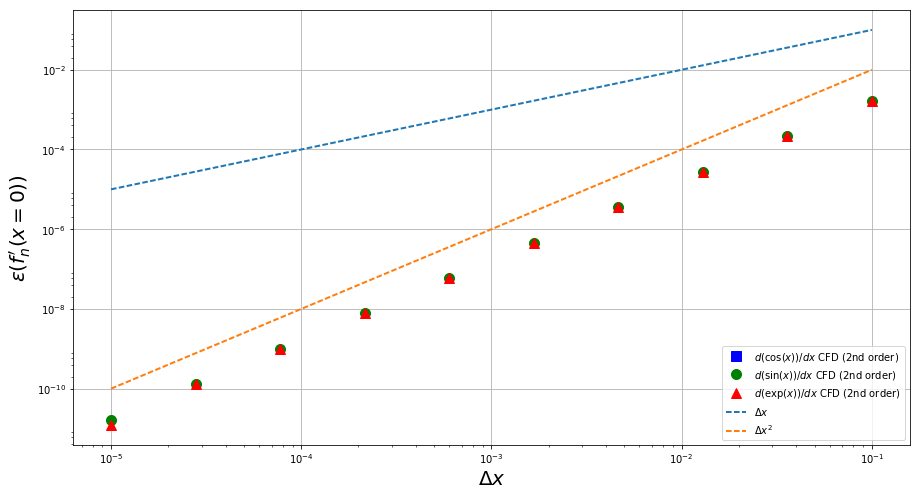

In [40]:
#Plot
fig = plt.figure(figsize=[15,8])
plt.plot(vDx,np.abs(vCFD_f1-df1_anal0),'bs',ms=10,lw=2.0,label=r'$ d (\cos(x)) / d x$ CFD (2nd order)')
plt.plot(vDx,np.abs(vCFD_f2-df2_anal0),'go',ms=10,lw=2.0, label=r'$ d (\sin(x)) / d x$ CFD (2nd order)')
plt.plot(vDx,np.abs(vCFD_f3-df3_anal0),'r^',ms=10,lw=2.0, label=r'$ d (\exp(x)) / d x$ CFD (2nd order)')
plt.plot(vDx,vDx,ls='dashed',lw=2.0,label=r'$\Delta x$')
plt.plot(vDx,vDx**2,ls='dashed',lw=2.0,label=r'$\Delta x^2$')
plt.legend(loc=4)
#plt.xlim([-np.pi,np.pi])
#plt.ylim([-1.1,5])
plt.grid('on');
plt.xlabel(r'$\Delta x$',size=20)
plt.ylabel(r'$\epsilon(f_n^{\prime}(x=0))$',size=20)
plt.xscale('log')
plt.yscale('log')
#plot(x,f2);

### (d) First Derivative Central Finite Differences  (Fourth order)

$f'(x_0) \approx \frac{-f(x_0+2 \Delta x) + 8 f(x_0 + \Delta x)- 8 f(x_0 - \Delta x) + f(x_0- 2 \Delta x) }{12 \Delta x}  + O(\Delta x^2)$

In [36]:
Ngrids= 10
vDx = np.logspace(-5,-1,Ngrids); #Create spacing vector
vCFD4_f1 = np.zeros(Ngrids) 
vCFD4_f2 = np.zeros(Ngrids)
vCFD4_f3 = np.zeros(Ngrids) 
df1_anal0 = 0.0;
df2_anal0 = 1.0;
df3_anal0 = 1.0;
x0 = 0.0
ii = 0
for Dx in vDx:
    vCFD4_f1[ii] = (-np.cos(x0+2*Dx) + 8*np.cos(x0+Dx)-8*np.cos(x0-Dx)+np.cos(x0-2*Dx))/(12*Dx);
    vCFD4_f2[ii] = (-np.sin(x0+2*Dx) + 8*np.sin(x0+Dx)-8*np.sin(x0-Dx)+np.sin(x0-2*Dx))/(12*Dx);
    vCFD4_f3[ii] = (-np.exp(x0+2*Dx) + 8*np.exp(x0+Dx)-8*np.exp(x0-Dx)+np.exp(x0-2*Dx))/(12*Dx);
    ii = ii + 1;
    if ii ==Ngrids:
        print "Numerical approximation of f1-derivative (Dx = %s) = %s, analytical value = %s"\
        %(vDx[ii-1],vCFD4_f1[ii-1],df1_anal0)
        print "Numerical approximation of f2-derivative (Dx = %s) = %s, analytical value = %s"\
        %(vDx[ii-1],vCFD4_f2[ii-1],df2_anal0)
        print "Numerical approximation of f3-derivative (Dx = %s) = %s, analytical value = %s"\
        %(vDx[ii-1],vCFD4_f3[ii-1],df3_anal0)

Numerical approximation of f1-derivative (Dx = 0.1) = 1.85037170771e-16, analytical value = 0.0
Numerical approximation of f2-derivative (Dx = 0.1) = 0.999996670633, analytical value = 1.0
Numerical approximation of f3-derivative (Dx = 0.1) = 0.999996662696, analytical value = 1.0


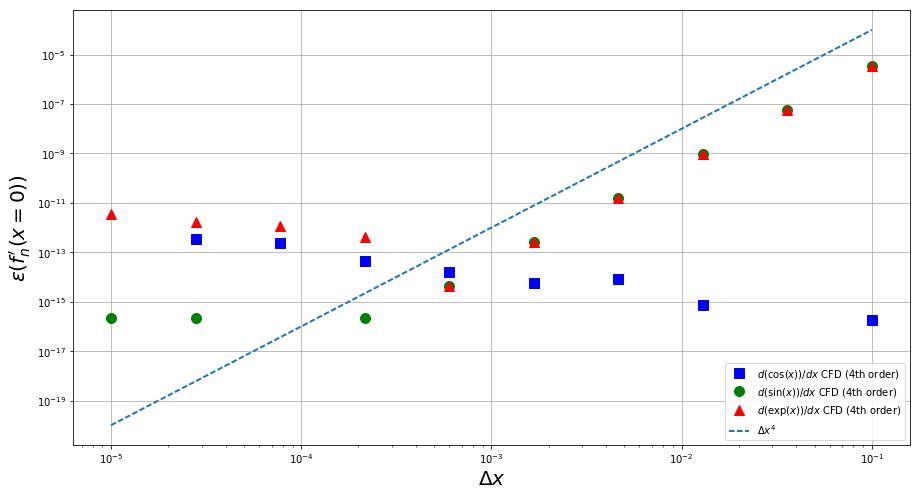

In [41]:
#Plot
fig = plt.figure(figsize=[15,8])
plt.plot(vDx,np.abs(vCFD4_f1-df1_anal0),'bs',ms=10,lw=2.0,label=r'$ d (\cos(x)) / d x$ CFD (4th order)')
plt.plot(vDx,np.abs(vCFD4_f2-df2_anal0),'go',ms=10,lw=2.0, label=r'$ d (\sin(x)) / d x$ CFD (4th order)')
plt.plot(vDx,np.abs(vCFD4_f3-df3_anal0),'r^',ms=10,lw=2.0, label=r'$ d (\exp(x)) / d x$ CFD (4th order)')
#plt.plot(vDx,vDx,ls='dashed',lw=2.0,label=r'$\Delta x$')
plt.plot(vDx,vDx**4,ls='dashed',lw=2.0,label=r'$\Delta x^4$')
plt.legend(loc=4)
#plt.xlim([-np.pi,np.pi])
#plt.ylim([-1.1,5])
plt.grid('on');
plt.xlabel(r'$\Delta x$',size=20)
plt.ylabel(r'$\epsilon(f_n^{\prime}(x=0))$',size=20)
plt.xscale('log')
plt.yscale('log')
#plot(x,f2);

## Exercise 2

A model for the velocity profile of a given boundary layer is given by the equation $v=A(1-\exp(-y/L))$, with $L=1$ and $A=1582$. Evaluate numerically the first derivative of $v$ at $y=0$, using the four grid points $y=0, 0.1,0.2$ and 0.3. Use one-sided formulas first, second and third order of accuracy. Compare the results with the analytical solution.

The function we need to compute is:

\begin{equation}
v=A(1-\exp(-y/L)), 
\end{equation}

with $L=1$ and $A=1582$.

Analytical solution:
\begin{equation}
v^{\prime}=A/L \exp(-y/L), 
\end{equation}


First, we can compute the function v at all the points we have in the grid and see the analytical solution of the derivative at $y=0$.

In [2]:
A= 1582.0
L = 1.0
y=0.0
v0 = A*(1-np.exp(-y/L))
y=0.1
v1 = A*(1-np.exp(-y/L))
y=0.2
v2 = A*(1-np.exp(-y/L))
y=0.3
v3 = A*(1-np.exp(-y/L))
print "v values at (0, 0.1, 0.2 and 0.3) are (%s, %s, %s, %s)" %( v0,v1,v2,v3)
print r"Analytical expression -> v'(y=0)= %s" %(A/L)

v values at (0, 0.1, 0.2 and 0.3) are (0.0, 150.547204667, 286.767948631, 410.025574882)
Analytical expression -> v'(y=0)= 1582.0


** This is growing fast...**

For a second order and third order forward derivative...

In [3]:
Dx = 0.1
vprime_1st  = (v1-v0)/(Dx)
vprime_2nd  = (4*v1-v2-3*v0)/(2*Dx)
vprime_3rd  = (18*v1-9*v2+2*v3-11*v0)/(6*Dx)
print "Numerical result for 1st order Forward derivative at y=0 is %s, with rel error = %s per cent" \
%(vprime_1st,np.abs((vprime_1st-A/L)/(A/L))*100)
print "Numerical result for 2nd order Forward derivative at y=0 is %s, with rel error = %s per cent" \
%(vprime_2nd,np.abs((vprime_2nd-A/L)/(A/L))*100)
print "Numerical result for 3rd order Forward derivative at y=0 is %s, with rel error = %s per cent" \
%(vprime_3rd,np.abs((vprime_3rd-A/L)/(A/L))*100)

Numerical result for 1st order Forward derivative at y=0 is 1505.47204667, with rel error = 4.83741803596 per cent
Numerical result for 2nd order Forward derivative at y=0 is 1577.10435019, with rel error = 0.309459532928 per cent
Numerical result for 3rd order Forward derivative at y=0 is 1581.64882683, with rel error = 0.0221980514784 per cent


## Second order forward derivative derivation

Recalling Taylor expansion for the 3 forward points.
    \begin{equation}
    f(x_0 + \Delta x) = \sum_{n=0}^{n=\infty} \frac{f^{(n)}(x_0) }{n!}\Delta x^n = \sum_{n=0}^{n=N} \frac{f^{(n)}(x_0) }{n!}\Delta x^n + O(\Delta x^{N+1})
    \end{equation}
    \begin{equation}
    f(x_0 + 2 \Delta x) = \sum_{n=0}^{n=\infty} \frac{f^{(n)}(x_0) }{n!} 2^n \Delta x^n = \sum_{n=0}^{n=N} \frac{f^{(n)}(x_0) }{n!} 2^n \Delta x^n + O(\Delta x^{N+1})
    \end{equation}
    \begin{equation}
    f(x_0 + 3 \Delta x) = \sum_{n=0}^{n=\infty} \frac{f^{(n)}(x_0) }{n!} 3^n \Delta x^n = \sum_{n=0}^{n=N} \frac{f^{(n)}(x_0) }{n!} 3^n \Delta x^n + O(\Delta x^{N+1})
    \end{equation}
For a Nth-order of error on the first derivative, we would need to expand the Taylor expansion up to N (involving the second derivative in this case) and then solve a linear system trying to get rid of non-desired derivatives.

For example, if we need a 2nd-order Forward approximation of the first derivative, we would need to make use of Taylor expansion up to 2nd-order evaluated at $x_0 + \Delta x$ and $x_0 + 2 \Delta x$:
\begin{array}
/
 f(x_0 + \Delta x) &=& f(x_0) +f^{\prime}(x_0) \Delta x + f^{\prime \prime}(x_0) \frac{\Delta x^2}{2} + O_1(\Delta x^3) \\
 f(x_0 +2\Delta x) &=& f(x_0) +2 f^{\prime}(x_0) \Delta x + f^{\prime \prime}(x_0) 2 \Delta x^2 + O_2(\Delta x^3)
\end{array}

Now, multiplying the first equation by 4 and substracting the second equation, we  get:

\begin{equation}
4 f(x_0 + \Delta x) - f(x_0+ 2\Delta x) = 3 f(x_0) + 2 f^{\prime}(x_0) \Delta x + O(\Delta x^3)
\end{equation}

Now, solving for the first derivative we get
\begin{equation}
f^{\prime}(x_0) = \frac{4 f(x_0 + \Delta x) - f(x_0+ 2\Delta x) - 3 f(x_0)}{2 \Delta x} + O(\Delta x^2)
\end{equation}



For the 3rd-order forward derivative, following same approach we get:

\begin{equation}
f^\prime (x_0) = \frac{18 f(x_0 + \Delta x) - 9f(x_0+2\Delta x) + 2 f(x_0 + 3\Delta x)-11 f(x_0) }{6 \Delta x}
\end{equation}